In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

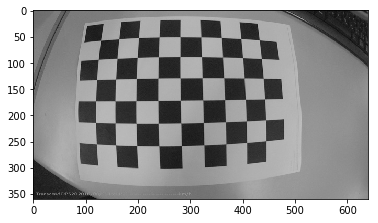

In [41]:
#show the image sample

#filename = 'chess_board.jpeg'
filename = 'chess3.jpg'
img = cv2.imread(filename)
plt.imshow(img)

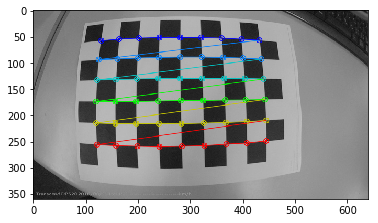

In [42]:
#number of x and y corners
nx = 9
ny = 6

#map the coordinates of corners in this 2D image
imgpoints = [] #2D points in image plane

# to the 3D coordinates of the real world, undistorted chessboard corners
objpoints = [] #3D points in real world space

#prepare object points, like (0, 0, 0) (2, 0, 0) ... (8, 5, 0)
objp = np.zeros((nx * ny, 3), np.float32) 
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='Greys')

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#draw the corners
if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    
    imgpoints.append(corners)
    objpoints.append(objp)

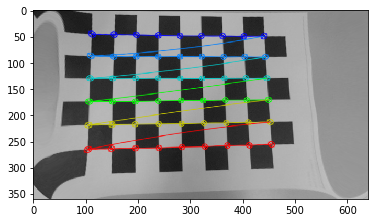

In [43]:
'''
mtx = camera matrix, that we need to transform 3D object points to 2D image points
dits = distortion coefficients

- Position camera in the world

rvecs = rotation vectors
tvecs = translation vectors
'''
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
undist = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(undist)